In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
%store -r data
%store -r data_test

In [232]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [233]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [234]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)


In [236]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


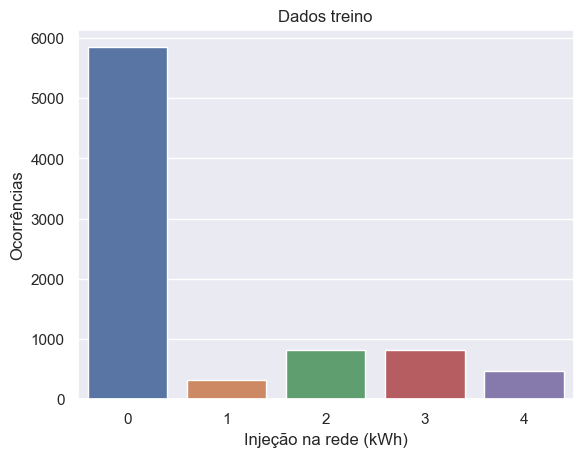

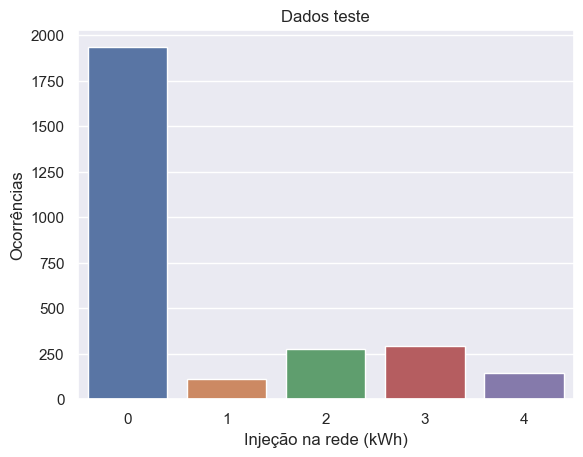

In [237]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [238]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [239]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from scikeras.wrappers import KerasClassifier

In [240]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.0


In [294]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=10, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(5, activation='softmax'))  # Adjusted for 5 classes
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model


In [295]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

In [296]:
X.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,13.97,13.54,11.45,14.04,81,4,3
1,0.0,0.0,0.0,13.48,13.02,13.43,13.90,82,4,3
2,0.0,0.0,0.0,12.93,12.47,12.72,13.43,84,4,3
3,0.0,0.0,0.0,12.61,12.15,10.34,12.93,85,4,3
4,0.0,0.0,0.0,12.61,12.17,9.79,12.93,86,4,3


In [297]:
X_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.765432,0.428571,0.666667
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.777778,0.428571,0.666667
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.802469,0.428571,0.666667
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.814815,0.428571,0.666667
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.827160,0.428571,0.666667


In [298]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=2022)
print(y_train.value_counts())
print(y_test.value_counts())

Injeção na rede (kWh)
0                        5850
2                         827
3                         827
4                         445
1                         313
Name: count, dtype: int64
Injeção na rede (kWh)
0                        1927
3                         276
2                         271
4                         161
1                         119
Name: count, dtype: int64


In [299]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [300]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 2022)

In [301]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 30, validation_split = 0.2, epochs = 20, random_state=2022)

In [302]:
#grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
#grid_search.fit(X_train,y_train)

In [303]:
# print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

In [304]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [305]:
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with %r" %(mean, stdev,param))

In [306]:
best_mlp_model = model

In [307]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose =1)

Epoch 1/20


2023-12-18 19:38:37.179755: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [8262,1]
	 [[{{node Placeholder/_11}}]]
2023-12-18 19:38:37.180177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [8262,1]
	 [[{{node Placeholder/_11}}]]


266/276 [===========================>..] - ETA: 0s - loss: 0.5281 - accuracy: 0.7872

2023-12-18 19:38:39.893183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2754,1]
	 [[{{node Placeholder/_11}}]]
2023-12-18 19:38:39.894016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype int64 and shape [2754,1]
	 [[{{node Placeholder/_11}}]]


276/276 [==============================] - 3s 9ms/step - loss: 0.5258 - accuracy: 0.7867 - val_loss: 0.4386 - val_accuracy: 0.8072
Epoch 2/20
276/276 [==============================] - 2s 9ms/step - loss: 0.4284 - accuracy: 0.8136 - val_loss: 0.4286 - val_accuracy: 0.7985
Epoch 3/20
276/276 [==============================] - 2s 8ms/step - loss: 0.3997 - accuracy: 0.8269 - val_loss: 0.4018 - val_accuracy: 0.8184
Epoch 4/20
276/276 [==============================] - 2s 8ms/step - loss: 0.3929 - accuracy: 0.8258 - val_loss: 0.3967 - val_accuracy: 0.8228
Epoch 5/20
276/276 [==============================] - 2s 9ms/step - loss: 0.3889 - accuracy: 0.8305 - val_loss: 0.4025 - val_accuracy: 0.8184
Epoch 6/20
276/276 [==============================] - 2s 9ms/step - loss: 0.3799 - accuracy: 0.8353 - val_loss: 0.4091 - val_accuracy: 0.8137
Epoch 7/20
276/276 [==============================] - 2s 7ms/step - loss: 0.3715 - accuracy: 0.8349 - val_loss: 0.3922 - val_accuracy: 0.8181
Epoch 8/20
276/27

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x7fb9676d3670>
	build_fn=None
	warm_start=False
	random_state=2022
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

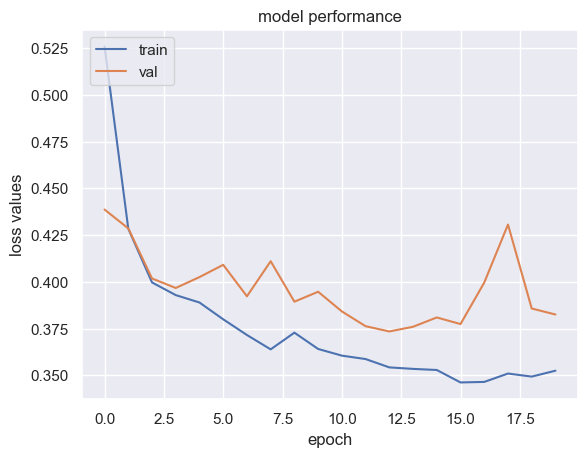

In [308]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

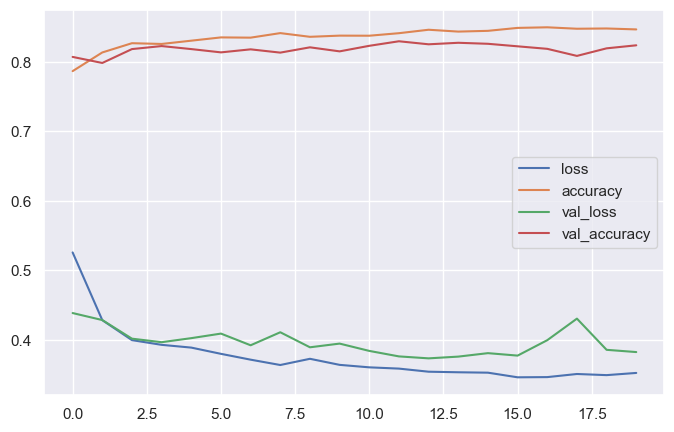

In [309]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [310]:
prediction = best_mlp_model.predict(X_test)

92/92 [==============================] - 0s 4ms/step


In [311]:
from sklearn import metrics

In [312]:
accuracy = metrics.accuracy_score(y_test, prediction)
precision = metrics.precision_score(y_test, prediction, average='weighted')
recall = metrics.recall_score(y_test, prediction, average='weighted')

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)

Accuracy:  0.8238925199709514
Precision:  0.8360958225146841
Recall:  0.8238925199709514


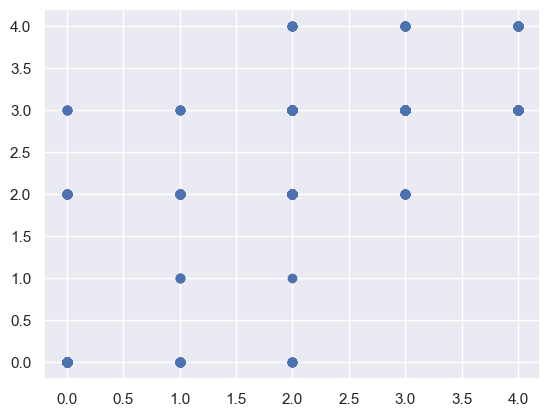

In [313]:
plt.scatter(y_test,prediction)

In [314]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)

    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

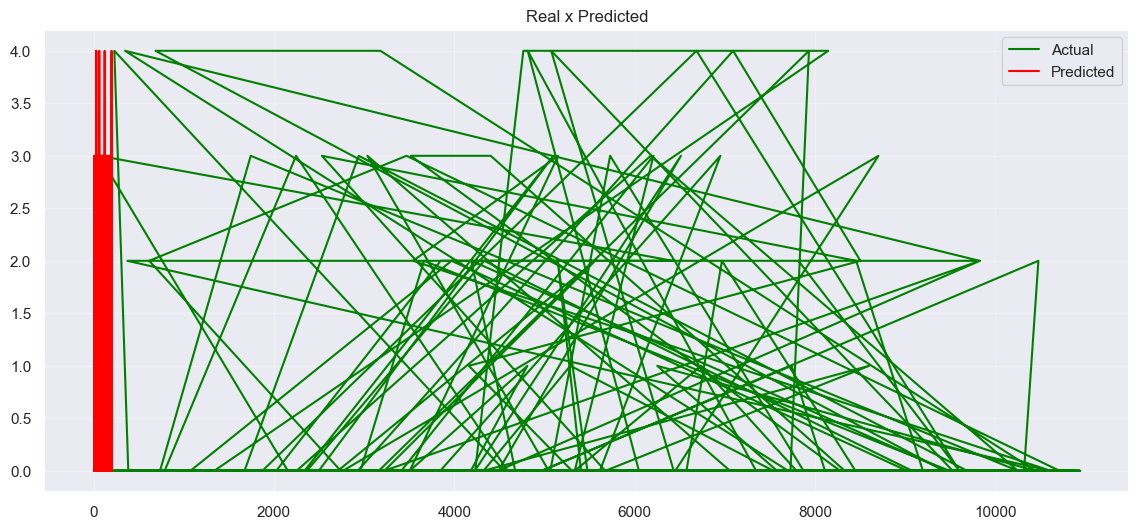

In [315]:
real_predicted_viz(200)

In [316]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [317]:
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_sub = best_mlp_model.predict(X_test_submission)
predictions_sub_2 = flat_list = [item for sublist in predictions_sub for item in sublist]
print(predictions_sub_2)

76/76 [==============================] - 0s 4ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [318]:
gera_csv(predictions_sub_2,'group20_an.csv')